In [8]:
def KMPSearch(txt, pat):
    n = len(txt)
    m = len(pat)
    result = False
    listOfIndex = []
    lps = [0]*m
    
    # procesamiento
    longitud = 0 # longitud del sufijo del prefijo mas largo
    i = 1
    while i < m:
        if pat[i] == pat[longitud]:
            longitud += 1
            lps[i] = longitud
            i += 1
        else:
            if longitud != 0:
                longitud = lps[longitud-1]
            else:
                lps[i] = 0
                i += 1
                
    j = 0
    i = 0
    while i < n:
        if pat[j] == txt[i]:
            i += 1
            j += 1
        if j == m:
            # print ("Found pattern at index " + str(i-j))
            listOfIndex += [i-j]
            result = True
            j = lps[j-1]
        elif i < n and pat[j] != txt[i]:

            if j != 0:
                j = lps[j-1]
            else:
                i += 1
    # if result == False:
        # print("Pattern doesn't occur")
    return listOfIndex

txt = "abcde"
pat = "cde"
print(KMPSearch(txt, pat))

txt = "abcde"
pat = "123"
print(KMPSearch(txt, pat))

txt = "ABABDABACDABABCABABAAAABABCABAB"
pat = "ABABCABAB"
print(KMPSearch(txt, pat))

txt = "AAAAAAAAAAAAAAAAAAAAAAAAAAAAAZ"
pat = "AAAAAZ"
print(KMPSearch(txt, pat))



'''
Analisis de 6 pasos:
Paso 1: n + m con n = len(texto) y m = len(patron)
paso 2: comparaciones entre Pat y Txt
paso 3: 1 + T_(n-1) + 1 + T_(m-1)
paso 4: T_kmp = n + m
paso 5: O(n + m)
'''



Found pattern at index 2
[2]
Pattern doesn't occur
[]
Found pattern at index 10
Found pattern at index 22
[10, 22]
Found pattern at index 24
[24]


'\nAnalisis de 6 pasos:\nPaso 1: n + m con n = len(texto) y m = len(patron)\npaso 2: comparaciones entre Pat y Txt\npaso 3: 1 + T_(n-1) + 1 + T_(m-1)\npaso 4: T_kmp = n + m\npaso 5: O(n + m)\n'

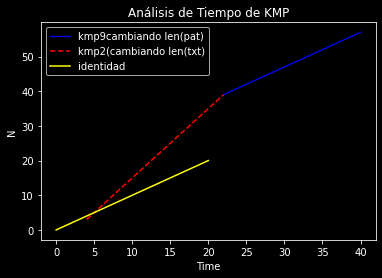

In [25]:
import matplotlib.pyplot  as plt
import numpy as np
import math as m

def KMPSearch_instrumentado(txt, pat):
    cont = 0 # instrumentacion
    n = len(txt)
    m = len(pat)
    result = False
    listOfIndex = []
    lps = [0]*m
    
    # procesamiento
    longitud = 0 # longitud del sufijo del prefijo mas largo
    i = 1
    while i < m:
        cont += 1 ## == del primer if
        if pat[i] == pat[longitud]:
            longitud += 1
            lps[i] = longitud
            i += 1
        else:
            if longitud != 0:
                longitud = lps[longitud-1]
            else:
                lps[i] = 0
                i += 1
                
    j = 0
    i = 0
    while i < n:
        cont += 1 # == del primer if
        if pat[j] == txt[i]:
            i += 1
            j += 1
        if j == m:
            # print ("Found pattern at index " + str(i-j))
            listOfIndex += [i-j]
            result = True
            j = lps[j-1]
        elif i < n and pat[j] != txt[i]:
            cont += 1 # !=
            if j != 0:
                j = lps[j-1]
            else:
                i += 1
    # if result == False:
        # print("Pattern doesn't occur")
    # return listOfIndex
    return cont


def test_KMP_instrumentado(filename, start, end, inc):
    # file = open(filename, 'w')
    # file.write('txt_const;pat_var;time;txt_var;pat_const;time\n')
    
    graph = [[],[],[],[]]
    for i in range(start, end, inc):
        txt = "aaaaaaaaaaaaaaaaaaah"
        pat = "a" * i
        l = list(pat)
        l[len(pat) - 1] = 'h'
        pat = "".join(l)
        
        graph[0].append(len(txt) + len(pat))
        graph[1].append(KMPSearch_instrumentado(txt, pat))
        
        txt2 = "aaa" * i
        pat2 = "ah"
        l2 = list(txt2)
        l2[len(txt2) - 1] = 'h'
        txt2 = "".join(l)
        graph[2].append(len(txt2) + len(pat2))
        graph[3].append(KMPSearch_instrumentado(txt2, pat2))
    return graph
        # file.write(f"{20};{len(pat)};{KMPSearch(txt, pat)};{len(txt2)};{2};{KMPSearch(txt2, pat2)}\n")
    # file.close

g = test_KMP_instrumentado('KMP_instrumentado.csv', 2, 21, 1)
tempX = list(range(21))
plt.plot(g[0], g[1],color="blue", label="kmp9cambiando len(pat)", linewidth=1.3) 
plt.plot(g[2], g[3], '--', color="red", label="kmp2(cambiando len(txt)")
plt.plot(tempX,tempX, '-', color='yellow', label="identidad")
plt.legend()
plt.xlabel('Time')
plt.ylabel("N")
plt.title("Análisis de Tiempo de KMP")
plt.show()